# Problem 1

Write a function which calculates the mode of a list of numbers. If there are two modes in the dataset, it should return both.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
x = np.array([2,3,8,1,10,4,12,3,8,14])
unique_elements, freq = np.unique(x, return_counts = True)
print(unique_elements)
print(freq)


[ 1  2  3  4  8 10 12 14]
[1 1 2 1 2 1 1 1]


In [6]:
max_freq = np.max(freq)
mode_index = np.where(freq == max_freq)
mode = x[mode_index]
print(mode)

[ 8 10]


# Problem 2

Perform outlier removal in the `duration` column of `phone_data.csv`

Plot the boxplot and distplot post outlier removal.

In [7]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [8]:
phone_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Maths for Data Science/Summarizing Data/phone_data.csv')

# New Section

In [9]:
phone_df.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [11]:
phone_df.describe()

,index,duration
count,830.000000,830.000000
mean,414.500000,117.804036
std,239.744656,444.129560
min,0.000000,1.000000
25%,207.250000,1.000000
50%,414.500000,24.500000
75%,621.750000,55.000000
max,829.000000,10528.000000


In [10]:
quartile_q1 = np.percentile(phone_df['duration'],25)
quartile_q2 = np.percentile(phone_df['duration'],50)
quartile_q3 = np.percentile(phone_df['duration'],75)
quartile_q4 = np.percentile(phone_df['duration'],100)



In [12]:
iqr = quartile_q3 - quartile_q1

In [13]:
lower_limit = quartile_q1 - (1.5 * iqr)
upper_limit = quartile_q3 + (1.5 * iqr)
lower_limit
upper_limit

136.0

In [17]:
new_phone_df = phone_df[(phone_df['duration']<upper_limit) & (phone_df['duration']>lower_limit)]

AttributeError: ignored

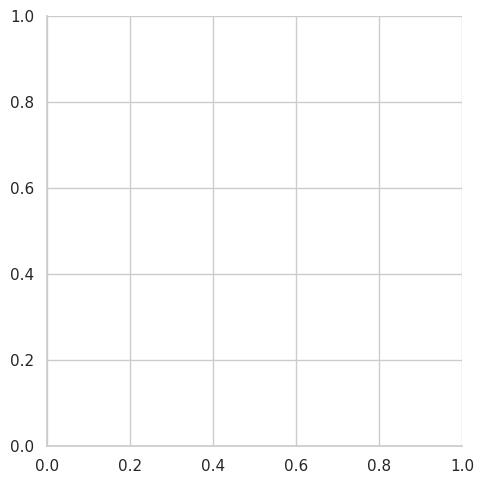

In [20]:
import seaborn as sns
sns.set_theme(style = "whitegrid")
sns.displot(new_phone_df['duration'], hist=True)